<h1 align="center"><span>Markov Chains & Trending Strategy</span></h1>

## 1 Markov Chains
### 1.1 Markov Chains: Introduction

#### Markov property says, for a random process, that if we know the value taken by the process at a given time, we won’t get any additional information about the future behaviour of the process by gathering more knowledge about the past.<br>Mathematically, we can denote a Markov chain by

<img src="markov_chain.png">

### 1.2 Markov Chains: Example

#### This is a example of transition matrix, which show the probability of transfer from one label to another

<img src="02.png">

#### The probabilistic dynamic of this Markov chain can be graphically represented as follows
<img src="03.png">

## 2 Random Walk Theory
### 2.1 What is the Random Walk Theory?

#### The Random Walk Theory, or the Random Walk Hypothesis, is a mathematical model of the stock market. Proponents of the theory believe that the prices of securities in the stock market evolve according to a random walk.

#### Basic Assumptions of the Random Walk Theory
-  The Random Walk Theory assumes that the price of each security in the stock market follows a random walk.
-  The Random Walk Theory also assumes that the movement in the price of one security is independent of the movement in the price of another security.

### 2.2 Random Walk: Example

#### This is probabilistic dynamic from example of Random Walk Theory, which can be graphically represented as follows
<img src="markov_chain_tree.png">

## 3 Analytic Part

#### Using some tools, we can show that stock price changes are part of random walk

### 3.1 Screping stock data from Yahoo Finance

####  Import libraries

In [1]:
from bs4 import BeautifulSoup
import requests
from selenium.webdriver import ActionChains
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

from scipy.stats import chisquare
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

#### There is also module created by me `helper_functions`

In [2]:
import helper_functions as hf

#### Get symbols data

In [3]:
stock_list = hf.get_symbols()
stock_list.head()

,Symbol,Name
0,EEENF,88 Energy Limited
1,XELA,"Exela Technologies, Inc."
2,PHIL,"PHI Group, Inc."
3,HCMC,Healthier Choices Management Corp.
4,BRYYF,Amani Gold Limited


#### Get stock changes from that symbol list

In [4]:
watch_df = hf.create_df(symbol_data = stock_list)


7 Failed downloads:
- DAOO: Data doesn't exist for startDate = 1483300800, endDate = 1640980800
- CBRG: Data doesn't exist for startDate = 1483300800, endDate = 1640980800
- FIT: No data found, symbol may be delisted
- OXEN-USD: None
- DWACW: No data found for this date range, symbol may be delisted
- ICP-USD: None
- AFAC: Data doesn't exist for startDate = 1483300800, endDate = 1640980800


#### There are 882 stocks for analysis

### 3.2 Transition matrixs for some intervals

- #### Transition matrix for binary process (increased / decreased)

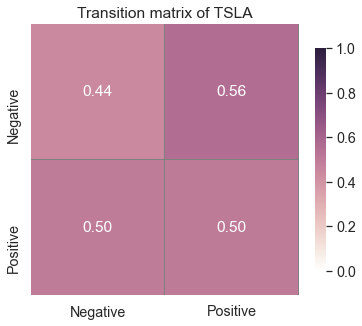

In [5]:
hf.transition_matrix_binary(watch_data=watch_df,
                            stock_name='TSLA')

- #### Transition matrix for medians (less then median / more then median)

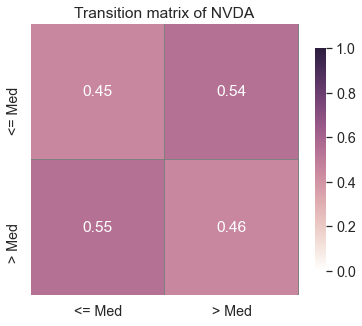

In [6]:
hf.transition_matrix_median(watch_data=watch_df,
                            stock_name='NVDA')

- #### Transition matrix for quartiles

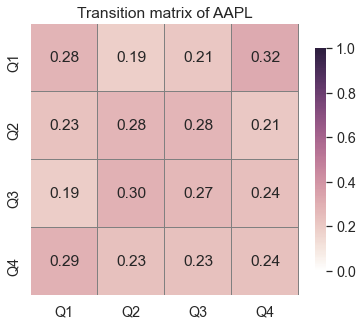

In [7]:
hf.transition_matrix_quartile(watch_data=watch_df,
                              stock_name='AAPL')

- #### Transition matrix for percentile

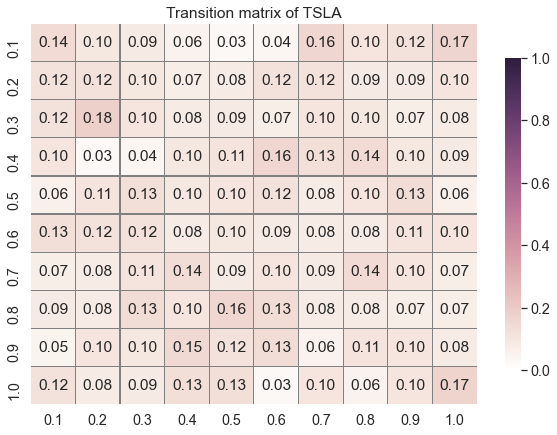

In [8]:
hf.transition_matrix_percentile(watch_data=watch_df,
                                stock_name='TSLA')

### 3.3 Analysis from all stocks

- #### Get overall information from stock data

In [9]:
all_stock_change, change_series, chisquare_stat, chisquare_pvalue = hf.transition_matrix_data(watch_df = watch_df,
                                                                                            stocks_list = stock_list.Symbol.unique())

- #### Transition matrix based on all stocks 

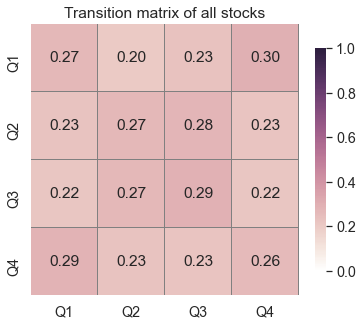

In [10]:
hf.trainsition_matrix_all(change_matrix = all_stock_change)

- #### Transition matrix with its distibutions

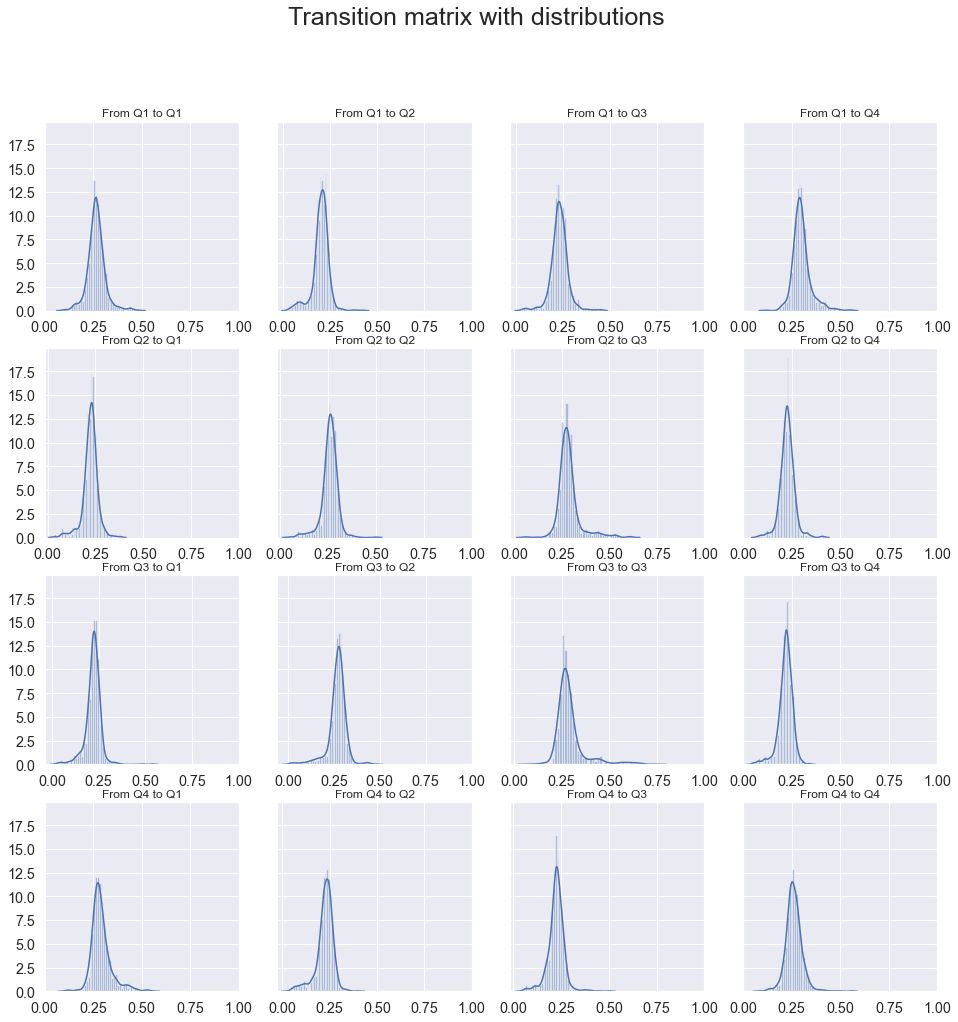

In [11]:
hf.changes_distributions(change_series = change_series)

#### The chi-square test tests whether empirical / observed distribution matches with expected distribution (i.e., distribution of the data is similar or different to that expected)

 - H0: observed and expected frequencies are independent<br>
     
 - H1: others

\begin{equation*}
\sum_{i} \frac{(observed_i - expected_i)^2}{expected_i} \text{ ~ } {x^{2}} ((\# col - 1)  (\#row - 1))
\end{equation*} 

- #### Distribution of `p_values` from ***chi-square test***

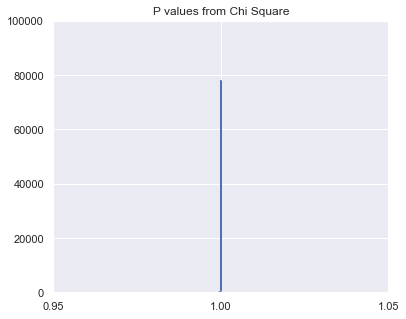

In [12]:
hf.plot_p_values(pvalue_list = chisquare_pvalue)

#### As we see from figure, `p_values` = 1 for all stocks, so there are ***Random walks***

## 4 Conclusion

#### The stock changes are subject of random walks, so it isn't possible to make predictions based on Markov chains.

## REFERENCES



<ol>
  <li><a href="https://towardsdatascience.com/brief-introduction-to-markov-chains-2c8cab9c98ab#:~:text=A%20Markov%20chain%20is%20a,that%20follows%20the%20Markov%20property.">Introduction to Markov chains</a></li>
  <li><a href="https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/what-is-the-random-walk-theory/">Random Walk Theory</a></li>
   <li><a href="https://finance.yahoo.com/">Yahoo Finance</a></li>
</ol>

<h2 align="center"><span>DSB 2021-2022</span></h2>